## ML with SKLearn




Isabelle Villegas - iav180000

In [ ]:
# 1. Read the Auto Data

# Loading the data
from pandas.core import describe
import pandas as pd

df = pd.read_csv('Auto.csv')

# Print out the first few rows of the file
print(df)

# Printing out the dimensions of the data frame
print('\nDimensions of data frame:', df.shape)

      mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0    18.0          8         307.0         130    3504          12.0  70.0   
1    15.0          8         350.0         165    3693          11.5  70.0   
2    18.0          8         318.0         150    3436          11.0  70.0   
3    16.0          8         304.0         150    3433          12.0  70.0   
4    17.0          8         302.0         140    3449           NaN  70.0   
..    ...        ...           ...         ...     ...           ...   ...   
387  27.0          4         140.0          86    2790          15.6  82.0   
388  44.0          4          97.0          52    2130          24.6  82.0   
389  32.0          4         135.0          84    2295          11.6  82.0   
390  28.0          4         120.0          79    2625          18.6  82.0   
391  31.0          4         119.0          82    2720          19.4  82.0   

     origin                       name  
0         1  chevrolet

In [ ]:
# 2. Data exploration with code

# Using the describe function on mpg, weight, and year attributes
df[['mpg', 'weight', 'year']].describe()

# Range and average for mpg is [37.6, 23.445918]
# Range and average for weight is [3527, 2977.584184]
# Range and average for year is [12, 76.010256]

,mpg,weight,year
count,392.000000,392.000000,390.000000
mean,23.445918,2977.584184,76.010256
std,7.805007,849.402560,3.668093
min,9.000000,1613.000000,70.000000
25%,17.000000,2225.250000,73.000000
50%,22.750000,2803.500000,76.000000
75%,29.000000,3614.750000,79.000000
max,46.600000,5140.000000,82.000000


In [ ]:
# 3. Explore Data Types

# check data types
df.dtypes   

# convert cylinders to categorical data type with numeric factor codes

df2 = df.copy()

df2.cylinders = df.cylinders.astype('category').cat.codes

print(df2.dtypes, "\n")
print(df2.head())  

# check data types
df.dtypes

# convert origin to categorical data type

df1 = df.copy()

df1.origin = df1.origin.astype('category')

print(df1.dtypes, "\n")
print(df1.head())

# check data types
df.dtypes

mpg             float64
cylinders          int8
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year            float64
origin            int64
name             object
dtype: object 

    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          4         307.0         130    3504          12.0  70.0   
1  15.0          4         350.0         165    3693          11.5  70.0   
2  18.0          4         318.0         150    3436          11.0  70.0   
3  16.0          4         304.0         150    3433          12.0  70.0   
4  17.0          4         302.0         140    3449           NaN  70.0   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  
mpg              float64
cylinders          int64
displacement     float64
ho

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year            float64
origin            int64
name             object
dtype: object

In [ ]:
# 4. Deal with NAs

df.isnull().sum()

# drop rows with NAs

df = df.dropna()
print('\nDimensions of data frame:', df.shape)


Dimensions of data frame: (389, 9)


In [ ]:
# 5. Modify Columns
avg = df["mpg"].mean()
df["mpg_high"] = df["mpg"] > avg

print(avg)

df["mpg_high"] = df["mpg_high"].astype(int)
print(df)

del df["mpg"]
del df["name"]

print(df)


23.490488431876607
      mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0    18.0          8         307.0         130    3504          12.0  70.0   
1    15.0          8         350.0         165    3693          11.5  70.0   
2    18.0          8         318.0         150    3436          11.0  70.0   
3    16.0          8         304.0         150    3433          12.0  70.0   
6    14.0          8         454.0         220    4354           9.0  70.0   
..    ...        ...           ...         ...     ...           ...   ...   
387  27.0          4         140.0          86    2790          15.6  82.0   
388  44.0          4          97.0          52    2130          24.6  82.0   
389  32.0          4         135.0          84    2295          11.6  82.0   
390  28.0          4         120.0          79    2625          18.6  82.0   
391  31.0          4         119.0          82    2720          19.4  82.0   

     origin                       name  mpg_

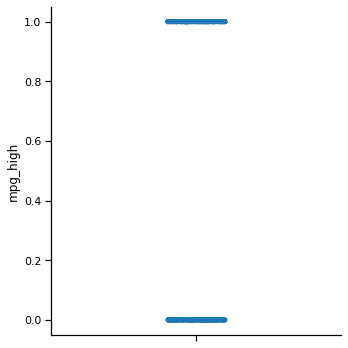

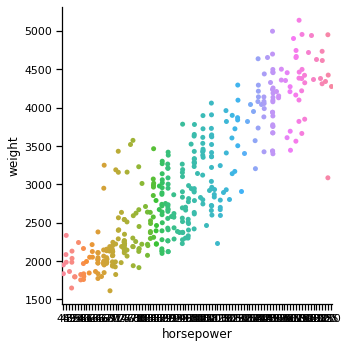

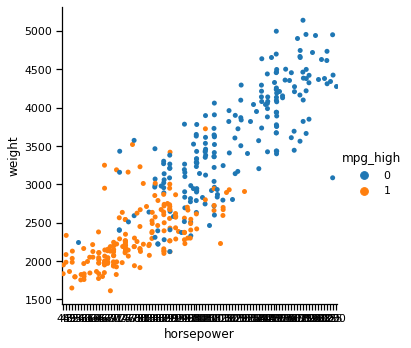

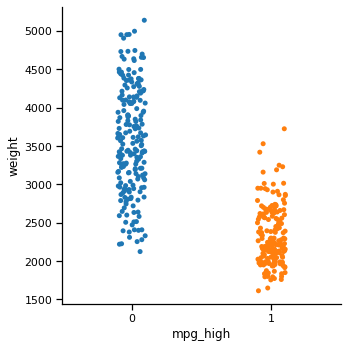

In [ ]:
# 6. Data Exploration with graphs
import seaborn as sb

# Shows that my column "mpg_high" is indeed only values of 1 and 0 and in binary values
sb.catplot(y="mpg_high", data=df)

# Weight and horsepower shown in the graph, the higher the weight, the higher the horsepower
sb.catplot(x="horsepower", y="weight", data=df)

# Plotting based on mpg_high as the different hues shows that although horsepower may go up 
# with weight, mpg is better with vehicles of a lower weight class
sb.catplot(x="horsepower", y="weight", hue = "mpg_high", data=df)

# Good mpg is shown with cars that weigh less
sb.catplot(x="mpg_high", y="weight", data=df)



In [ ]:
# 7. Train/test split
from sklearn.model_selection import train_test_split
import random

X = df.loc[:, ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']]
y = df.mpg_high

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

df_train, df_test= train_test_split(df, test_size=0.2, random_state=0)

print('train dimensions:', df_train.shape)
print('test dimensions:', df_test.shape)

random.seed(1234)

train dimensions: (311, 8)
test dimensions: (78, 8)


In [ ]:
# 8. Logistic Regression
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver='lbfgs', max_iter=1000)
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.9003215434083601

In [ ]:
# make predictions
pred = clf.predict(X_test)

# evaluate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('accuracy score: ', accuracy_score(y_test, pred))
print('precision score: ', precision_score(y_test, pred))
print('recall score: ', recall_score(y_test, pred))
print('f1 score: ', f1_score(y_test, pred))

# confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred)

accuracy score:  0.8717948717948718
precision score:  0.8157894736842105
recall score:  0.9117647058823529
f1 score:  0.861111111111111


array([[37,  7],
       [ 3, 31]])

In [ ]:
# 9. Decision Tree

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# make predictions
pred = clf.predict(X_test)

# evaluate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('accuracy score: ', accuracy_score(y_test, pred))
print('precision score: ', precision_score(y_test, pred))
print('recall score: ', recall_score(y_test, pred))
print('f1 score: ', f1_score(y_test, pred))

# confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred)


accuracy score:  0.8974358974358975
precision score:  0.8611111111111112
recall score:  0.9117647058823529
f1 score:  0.8857142857142858


array([[39,  5],
       [ 3, 31]])

In [ ]:
# 10. Neural Network

# normalize the data
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# train 
# Using the perceptron neural network topology
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(5, 2), max_iter=500, random_state=1234)
clf.fit(X_train_scaled, y_train)

# make predictions
pred = clf.predict(X_test_scaled)

# output results
print('accuracy = ', accuracy_score(y_test, pred))

confusion_matrix(y_test, pred)

# make predictions
y_pred = clf.predict(X_test)

# evaluation
from sklearn.metrics import mean_squared_error, r2_score
print('mse=', mean_squared_error(y_test, y_pred))
print('correlation=', r2_score(y_test, y_pred))


accuracy =  0.9102564102564102
mse= 0.4358974358974359
correlation= -0.7727272727272718


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
# Using the perceptron neural network topology

# train the algorithm
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(hidden_layer_sizes=(6, 3), max_iter=500, random_state=1234)
regr.fit(X_train, y_train)

# make predictions
y_pred = regr.predict(X_test)

# evaluation
from sklearn.metrics import mean_squared_error, r2_score
print('mse=', mean_squared_error(y_test, y_pred))
print('correlation=', r2_score(y_test, y_pred))

mse= 0.6613147721939365
correlation= -1.6894646216764087


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


From the results of both here we can see that the Classifier neural network achieved an mse of 0.436 while the Regressor neural network achieved a higher mse of 0.661. This reveals that the first neural network did a lot better than the second network with a more accurate fit.

11. Analysis 

  a) Of all of the algorithms, it appeared that the neural networks did the best in terms of accuracy.

  b) The first neural network had the best accuracy at 0.910 while the logistic regression came in a close second with an accuracy of 0.900

  c) Although neural networks are more prone to overfitting a data set, in this example, it is better, probably because the data set is on the smaller side. Normally, logistic regression is pretty good though since it is made for binary classification and since we were testing out mpg_high in this homework it made for an accurate determinant of mpg. 

  d) Comparing R to sklearn, I think I definitely prefer to use python in Google's CoLab, just because I feel like it is a lot easier and straight forward to understand and modify. I think in the future I would like to play more with python in CoLab because of its ease of use.